<a href="https://colab.research.google.com/github/PulkitChaudhari/Backtesting-Python/blob/main/code_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import cv2
import tensorflow as tf

Importing Tensorflow and OpenCV libraries

In [11]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [12]:
import os
os.chdir('/drive/My Drive/')

Importing OS module

In [13]:
DATADIR = 'dataset/test'
CATAGORIES = ["freshbanana","rottenbanana"]

Creating a directory for data and Catagories for classificiation of fruits into fresh and raw category (here Banana).

In [21]:
def prepare(filepath):
    IMG_SIZE = 50
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    print(img_array)
    plt.imshow(img_array)
    plt.show()
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    plt.imshow(new_array)
    plt.show()
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

Creating a function "prepare" which greyscales and reshapes the image 

In [15]:
model = tf.keras.models.load_model("onefruit-cnn.model")

In [8]:
model.save('farmproduceclassifier.h5')

Loading a model

[[254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


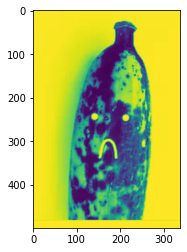

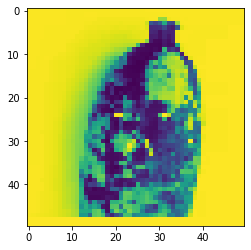

1/1 [==============================] - 0s 374ms/step
rotten


In [23]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
path = '/drive/MyDrive/dataset/test/rottenbanana/Screen Shot 2018-06-12 at 8.59.44 PM.png'
prediction = model.predict([prepare(path)])
if (prediction[0][0] == 1): print("rotten")
else: print("fresh")

Predicting if image is Fresh or Rotten

In [ ]:
testing_data = []
IMG_SIZE = 50

CATEGORIES = ["freshbanana","rottenbanana"]
def create_testing_data():
    for category in CATEGORIES: 

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category) 

        for img in tqdm(os.listdir(path)): 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                testing_data.append([new_array, class_num])
            except Exception as e:
                pass
           
create_testing_data()

print(len(testing_data))

100%|██████████| 531/531 [00:04<00:00, 114.57it/s]

912


Creating test data

In [ ]:
import random

random.shuffle(testing_data)
X = []
y = []
import numpy as np
for features,label in testing_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
import pickle

pickle_out = open("ATXNS.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("atyns.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]]


Shuffing the data using random and serializing data using pickle for writing
Pickle is used to serialize data (Image here)

In [ ]:
import pickle
import numpy as np
pickle_in = open("ATXNS.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("atyns.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0
X = np.array(X)
y = np.array(y)

Loading pickle model for reading and setting RGB norms

In [ ]:
results = model.evaluate(X, y, batch_size=128)
print('test loss, test acc:', results)

8/8 [==============================] - 2s 101ms/step - loss: 0.0324 - accuracy: 0.9890
test loss, test acc: [0.032404329627752304, 0.9890230298042297]


Calculating results